In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 30

In [4]:
# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\train_aug",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28287 files belonging to 7 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 736 files belonging to 7 classes.
Found 726 files belonging to 7 classes.


In [6]:
class_names = train_ds.class_names
class_names

['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

In [7]:
# Create ResNet50 model
def create_resnet50_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), num_classes=len(class_names)):
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [8]:
# Instantiate and compile the model
model = create_resnet50_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
Non-trainable params: 23,587,712
____________________________________

In [9]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/30
884/884 [==============================] - 48s 50ms/step - loss: 0.3942 - accuracy: 0.8640 - val_loss: 0.4464 - val_accuracy: 0.8682
Epoch 2/30
884/884 [==============================] - 44s 50ms/step - loss: 0.1736 - accuracy: 0.9393 - val_loss: 0.3254 - val_accuracy: 0.9198
Epoch 3/30
884/884 [==============================] - 44s 50ms/step - loss: 0.1412 - accuracy: 0.9494 - val_loss: 0.2538 - val_accuracy: 0.9280
Epoch 4/30
884/884 [==============================] - 44s 50ms/step - loss: 0.1131 - accuracy: 0.9589 - val_loss: 0.3160 - val_accuracy: 0.9239
Epoch 5/30
884/884 [==============================] - 44s 50ms/step - loss: 0.1015 - accuracy: 0.9644 - val_loss: 0.3908 - val_accuracy: 0.9253
Epoch 6/30
884/884 [==============================] - 44s 50ms/step - loss: 0.0855 - accuracy: 0.9697 - val_loss: 0.2624 - val_accuracy: 0.9457
Epoch 7/30
884/884 [==============================] - 45s 50ms/step - loss: 0.0908 - accuracy: 0.9688 - val_loss: 0.2678 - val_accuracy:

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

23/23 [==============================] - 1s 50ms/step - loss: 0.4304 - accuracy: 0.9435
Test accuracy: 94.35%


In [11]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("resnet50_Rice_Pest_aug model.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
# Save the model weights to an H5 file
model.save_weights("resnet50_Rice_Pest_aug_model_weights.h5")

# Optionally, you can save the entire model (architecture + weights) in H5 format
model.save("resnet50_Rice_Pest_aug_full_model.h5")

print("Model architecture and weights have been saved.")

Model architecture and weights have been saved.


In [13]:
# Evaluate on validation dataset
scores_val = model.evaluate(val_ds)
print(f"Validation loss: {scores_val[0]}, Validation accuracy: {scores_val[1]}")

# Evaluate on test dataset
scores_test = model.evaluate(test_ds)
print(f"Test loss: {scores_test[0]}, Test accuracy: {scores_test[1]}")

# Evaluate on training dataset
scores_train = model.evaluate(train_ds)
print(f"Training loss: {scores_train[0]}, Training accuracy: {scores_train[1]}")

23/23 [==============================] - 1s 48ms/step - loss: 0.5108 - accuracy: 0.9375
Validation loss: 0.5107511281967163, Validation accuracy: 0.9375
23/23 [==============================] - 1s 48ms/step - loss: 0.4304 - accuracy: 0.9435
Test loss: 0.43040183186531067, Test accuracy: 0.9435261487960815
884/884 [==============================] - 43s 49ms/step - loss: 0.0037 - accuracy: 0.9987
Training loss: 0.003690039971843362, Training accuracy: 0.998691976070404


In [14]:
# Define the data
data = {
    'Metric': ['Validation Loss', 'Validation Accuracy', 'Test Loss', 'Test Accuracy', 'Training Loss', 'Training Accuracy'],
    'Score': [scores_val[0], scores_val[1], scores_test[0], scores_test[1],scores_train[0], scores_train[1]]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('ResNet50_evaluation_results_Rice_Pest_aug.csv', index=False)

print("Evaluation results saved to 'evaluation_results.csv'.")

Evaluation results saved to 'evaluation_results.csv'.


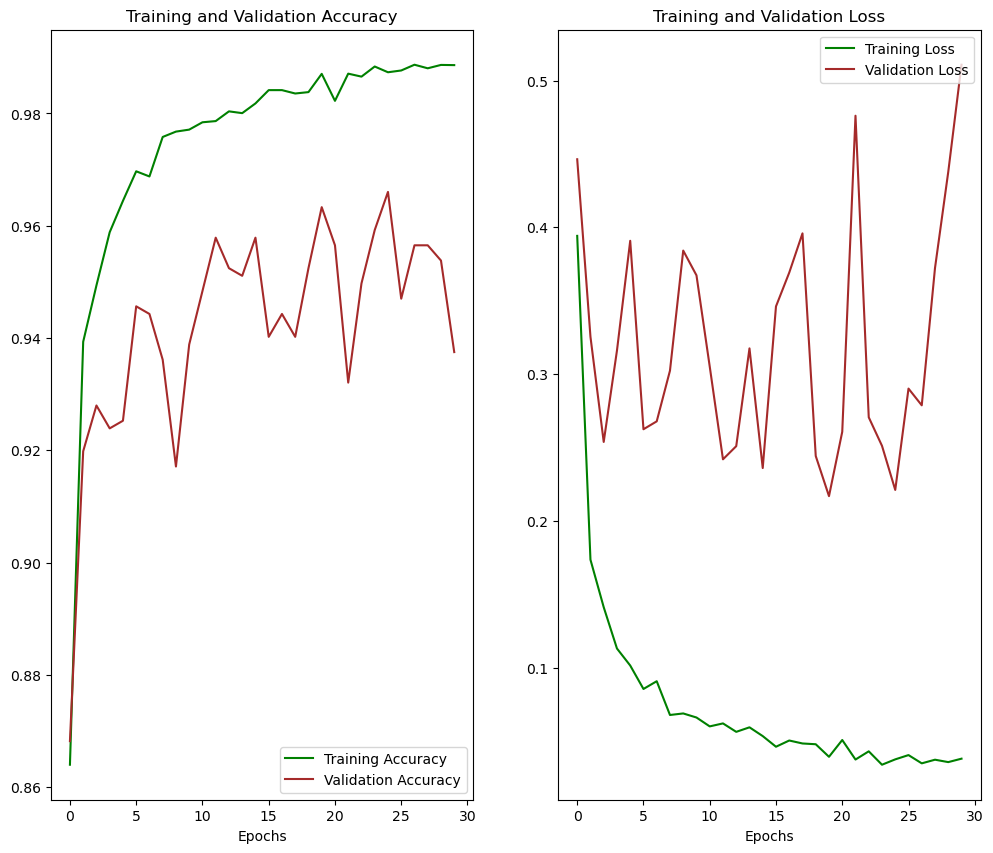

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='green')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='brown')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Adding x-axis label

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='green')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='brown')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Adding x-axis label

plt.savefig("ResNet50 Accuracy and Loss_Rice_Pest_aug.png", bbox_inches='tight', dpi=2000)
plt.show()


In [16]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print (predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
    print(predicted_class, confidence)

first image to predict
actual label: Gundhi Bug
1/1 [==============================] - 1s 689ms/step
predicted label: Gundhi Bug


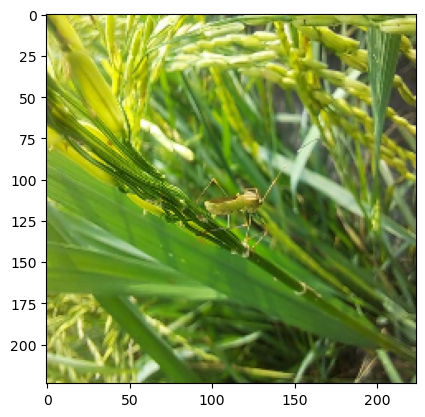

In [17]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 [==============================] - 1s 658ms/step


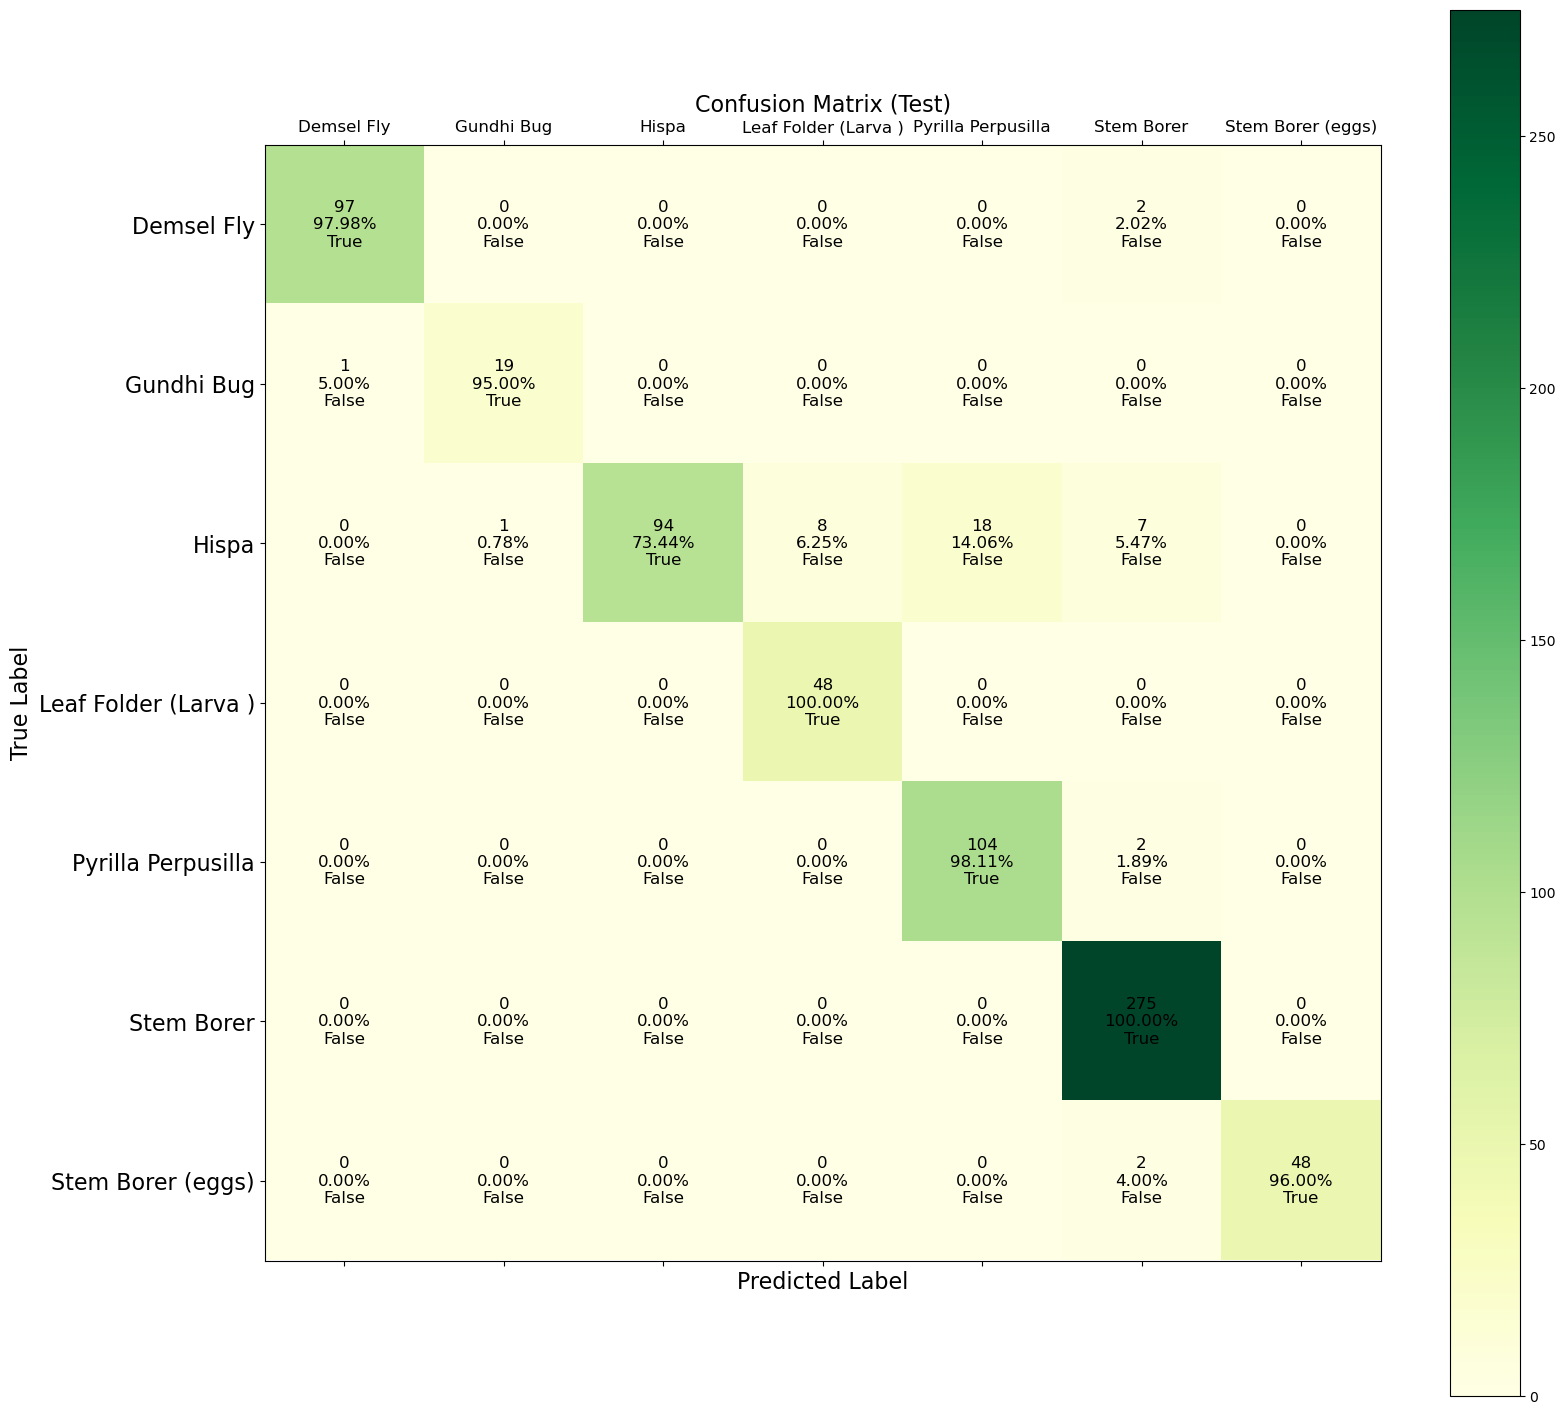

In [18]:
import pandas as pd
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in test_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(18, 18))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn)

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)  # Set font size for x-axis labels
ax.set_yticklabels(class_names, fontsize=16)  # Set font size for y-axis labels
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)  # Set font size and color for text

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix (Test)", fontsize=16)  # Set title font size
plt.xlabel("Predicted Label", fontsize=16)  # Set x-axis label font size
plt.ylabel("True Label", fontsize=16)  # Set y-axis label font size
plt.savefig("ResNet50 Confusion Matrix Test_Rice_Pest_aug", bbox_inches='tight', dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('test_results_ResNet50_Rice_Pest_aug.csv', index=False)

In [19]:
# Let's assume you have a pre-trained model named 'model'
# Get one batch of images and labels from the test dataset
for test_images, test_labels in test_ds.take(1):
    break

# Make predictions
logits = model(test_images)
test_predictions = tf.argmax(logits, axis=1)

# Convert to numpy for easier handling in plotting
test_images = test_images.numpy()
test_labels = test_labels.numpy()
test_predictions = test_predictions.numpy()

In [20]:
test_images = []
test_labels = []
predictions = []

# Assuming 'test_ds' is your testing dataset
for images, labels in test_ds.take(-1):  # Take all batches in the dataset
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

# Convert lists to numpy arrays for easier handling
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = np.array(predictions)

1/1 [==============================] - 0s 24ms/step


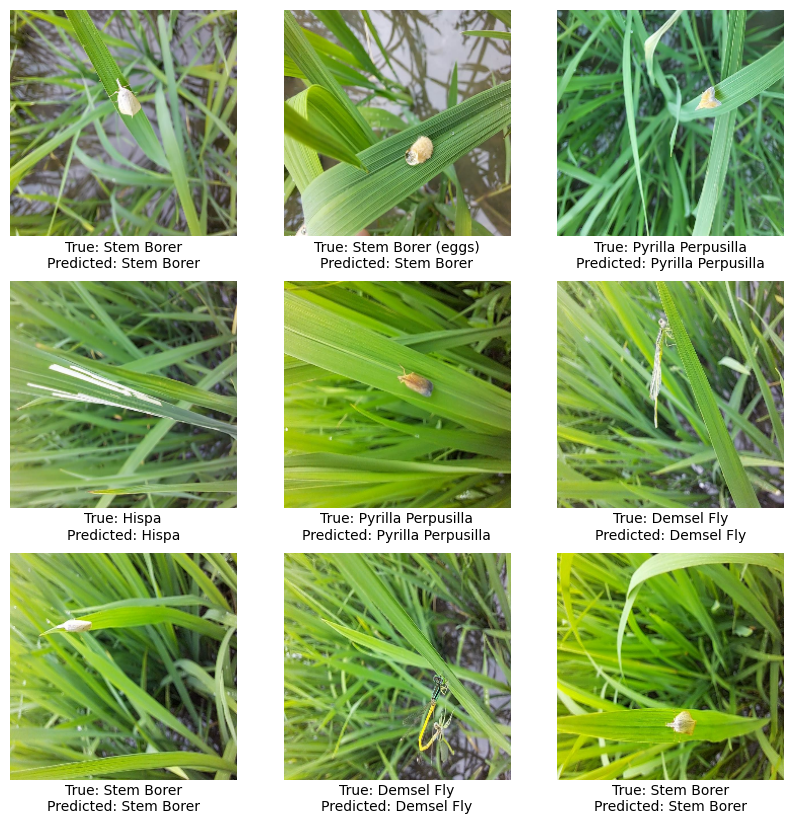

In [21]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10,fontsize=10, y=-0.2)
    plt.axis("off")

plt.savefig("ResNet50_True and Predicted label of Rice_Pest_aug",bbox_inches='tight', dpi=2000)
plt.show()


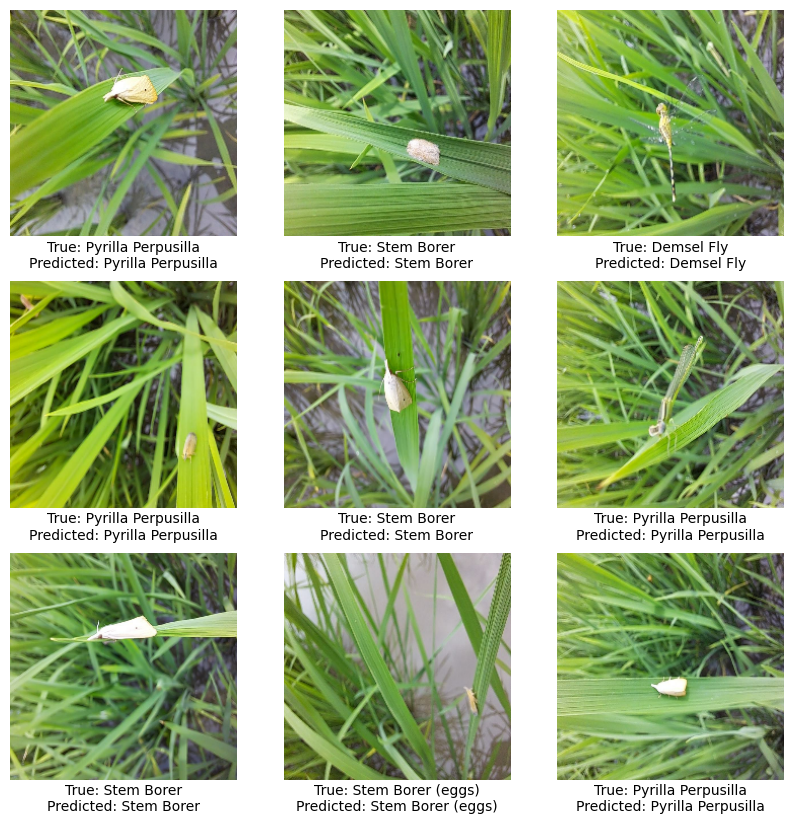

In [29]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10, fontsize=10, y=-0.2)  # Adjust y position
    plt.axis("off")

plt.savefig("ResNet50_True and Predicted label of Rice_Pest2_aug", bbox_inches='tight', dpi=2000)
plt.show()

In [23]:
# Assuming `model` is your trained model

test_labels = []
test_predictions = []

for images, labels in test_ds:
    preds = model.predict(images)
    test_predictions.extend(np.argmax(preds, axis=1))
    test_labels.extend(labels.numpy())

test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)

# Assuming class_names are extracted correctly from the dataset directory
class_names = test_ds.class_names

1/1 [==============================] - 0s 23ms/step


In [24]:
from sklearn.metrics import precision_recall_fscore_support

In [25]:
# Compute precision, recall, f1 score, and other metrics
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_predictions, average=None, labels=np.arange(len(class_names)))
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='micro')
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='macro')
weighted_precision, weighted_recall, weighted_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Add micro, macro, and weighted averages to the DataFrame
metrics_df = metrics_df.append({
    'Class': 'Micro Average',
    'Precision': micro_precision,
    'Recall': micro_recall,
    'F1 Score': micro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Macro Average',
    'Precision': macro_precision,
    'Recall': macro_recall,
    'F1 Score': macro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Weighted Average',
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1 Score': weighted_f1_score
}, ignore_index=True)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics_ResNet50_Rice_Pest_aug.csv', index=False)

# Print the DataFrame
print(metrics_df)

                  Class  Precision    Recall  F1 Score
0            Demsel Fly   0.989796  0.979798  0.984772
1            Gundhi Bug   0.950000  0.950000  0.950000
2                 Hispa   1.000000  0.734375  0.846847
3  Leaf Folder (Larva )   0.857143  1.000000  0.923077
4    Pyrilla Perpusilla   0.852459  0.981132  0.912281
5            Stem Borer   0.954861  1.000000  0.976909
6     Stem Borer (eggs)   1.000000  0.960000  0.979592
7         Micro Average   0.943526  0.943526  0.943526
8         Macro Average   0.943466  0.943615  0.939068
9      Weighted Average   0.949146  0.943526  0.941498


C:\Users\Hp\AppData\Local\Temp\ipykernel_14772\1541154561.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_14772\1541154561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_14772\1541154561.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


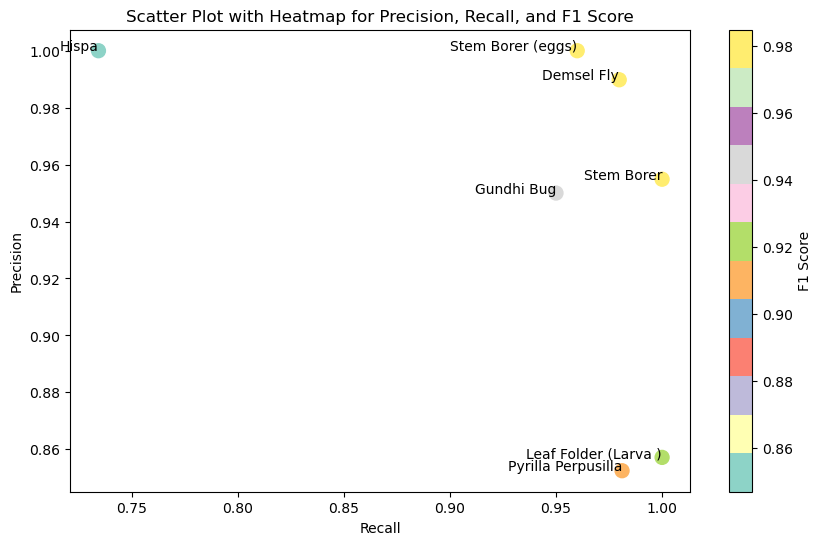

In [26]:
# Create a scatter plot with heatmaps and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)  # Adjusted the size
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.colorbar(label='F1 Score')

# Add labels for each point in the scatter plot
for i, label in enumerate(class_names):
    plt.text(recall[i], precision[i], label, fontsize=10, ha='right')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("ResNet50_Rice_Pest_aug_Scatter Plot with Heatmap for Precision, Recall, and F1 Score", bbox_inches= 'tight', dpi= 2000)
plt.show()

1/1 [==============================] - 0s 27ms/step


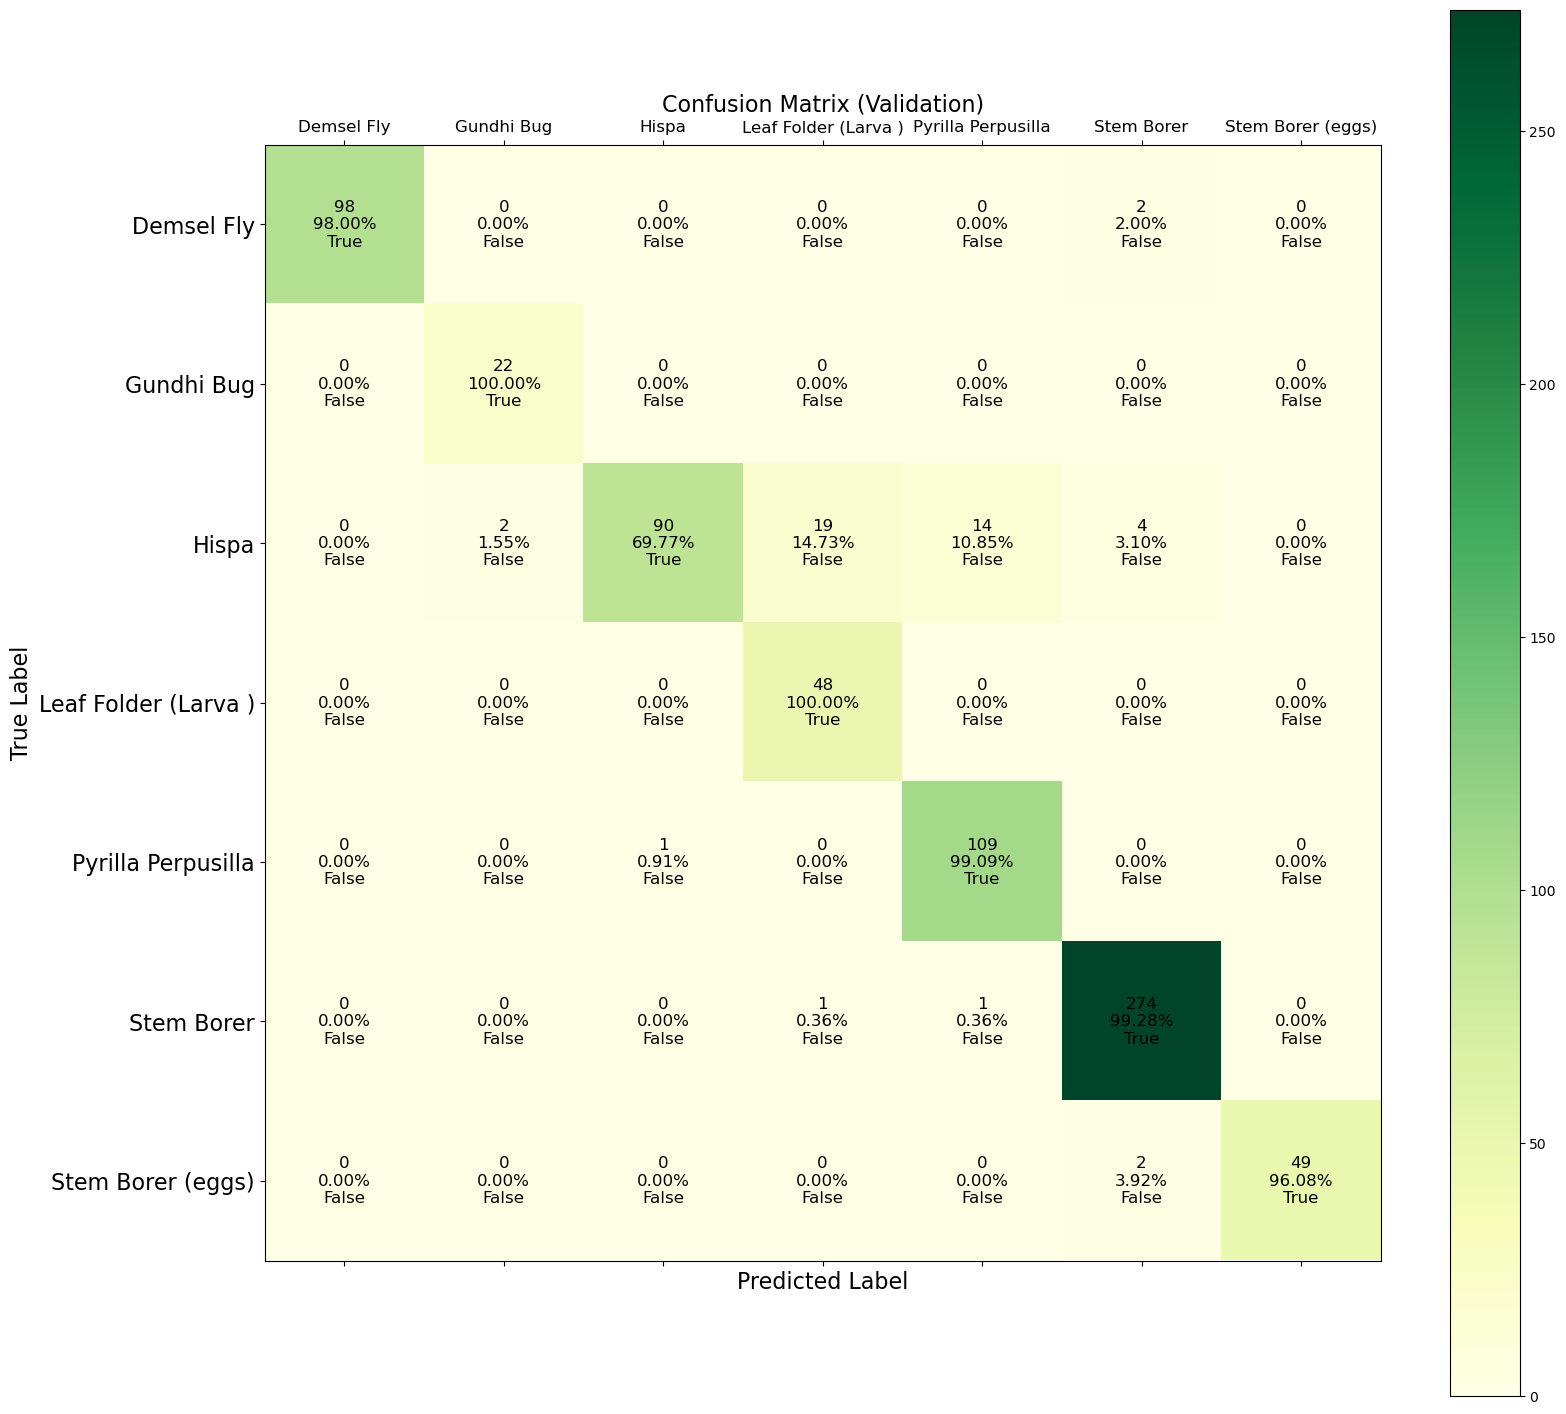

In [27]:
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in val_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(18, 18))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn)

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names,fontsize=12)
ax.set_yticklabels(class_names,fontsize=16)
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix (Validation)",fontsize=16)
plt.xlabel("Predicted Label",fontsize=16)
plt.ylabel("True Label",fontsize=16)
plt.savefig("ResNet50_Rice_Pest_aug Confusion Matrix Validation", bbox_inches='tight', dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('Rice valid_results_ResNet50_Pest_aug.csv', index=False)

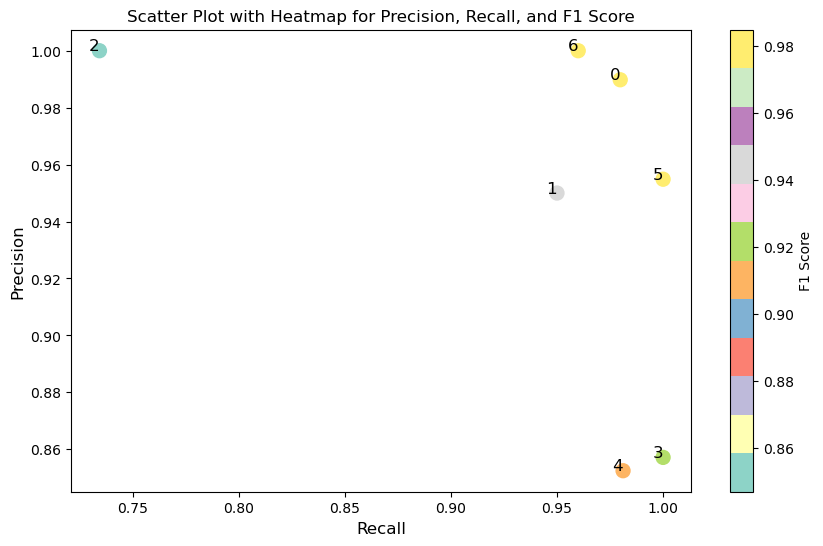

In [28]:
# Assuming recall, precision, and f1_score are already computed
# and class_names is a list of class names

# Create a mapping from class index to class name
class_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Create a scatter plot with heatmap and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.colorbar(label='F1 Score')

# Add numbered labels for each point in the scatter plot
for i in range(len(class_names)):
    plt.text(recall[i], precision[i], str(i), fontsize=12, ha='right')

# Create a legend for the mapping of numbers to class names
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{i}: {class_name}',
                      markersize=10, markerfacecolor='gray') for i, class_name in class_mapping.items()]
#plt.legend(handles=handles, title='Class Mapping', bbox_to_anchor=(1.05, 1), loc='best')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("ResNet50_Rice_Pest_aug_Scatter_Plot_with_Heatmap_for_Precision_Recall_and_F1_Score1",bbox_inches='tight', dpi=2000)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution_pie(dataset, title, filename):
    class_names = dataset.class_names
    class_counts = {class_name: 0 for class_name in class_names}

    for images, labels in dataset:
        for label in labels:
            class_counts[class_names[label]] += 1

    sorted_class_counts = dict(sorted(class_counts.items()))

    plt.figure(figsize=(12, 12))
    colors = sns.color_palette('pastel')[0:len(sorted_class_counts)]

    plt.pie(sorted_class_counts.values(), labels=sorted_class_counts.keys(), autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title, fontsize=15)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #plt.savefig(filename, dpi=2000)
    plt.show()

# Plotting the class distribution using pie charts and saving them
plot_class_distribution_pie(train_ds, 'Class Distribution in Training Set', 'train_class_distribution_pie.png')
plot_class_distribution_pie(val_ds, 'Class Distribution in Validation Set', 'val_class_distribution_pie.png')
plot_class_distribution_pie(test_ds, 'Class Distribution in Test Set', 'test_class_distribution_pie.png')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution_pie(dataset, title, filename):
    class_names = dataset.class_names
    class_counts = {class_name: 0 for class_name in class_names}

    for images, labels in dataset:
        for label in labels:
            class_counts[class_names[label]] += 1

    sorted_class_counts = dict(sorted(class_counts.items()))
    total_counts = sum(sorted_class_counts.values())

    plt.figure(figsize=(12, 12))
    colors = sns.color_palette('pastel')[0:len(sorted_class_counts)]

    labels_with_counts = [f'{k} ({v})' for k, v in sorted_class_counts.items()]

    plt.pie(sorted_class_counts.values(), labels=labels_with_counts, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title, fontsize=15)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(filename, dpi=2000)
    plt.show()

# Plotting the class distribution using pie charts and saving them
plot_class_distribution_pie(train_ds, 'Class Distribution in Training Set', 'train_class_distribution_pie.png')
plot_class_distribution_pie(val_ds, 'Class Distribution in Validation Set', 'val_class_distribution_pie.png')
plot_class_distribution_pie(test_ds, 'Class Distribution in Test Set', 'test_class_distribution_pie.png')